In [122]:
from monodromy.coverage import gates_to_coverage, coverage_lookup_decomposition, coverage_lookup_cost
from monodromy.render import gates_to_coverage_plot, _plot_coverage_set, _plot_polytope
from monodromy.haar import gates_to_haar, expected_cost
from qiskit.circuit.library import *
from math import pi
import pickle

import sys
sys.path.append('..')

from canopus.basics import CanonicalGate
from accel_utils import optimal_can_gate_duration


In [33]:
gate_coords = {
    'cx': (0.5, 0, 0),
    'cv': (0.25, 0, 0),
    'sqisw': (0.25, 0.25, 0),
    'iswap': (0.5, 0.5, 0),
    'b': (0.5, 0.25, 0),
    'ecp': (0.5, 0.25, 0.25),
    'swap': (0.5, 0.5, 0.5),
    'pswap_π_6': (0.5, 0.5, 1/3),
    'pswap_π_4': (0.5, 0.5, 1/4),
    'pswap_π_2': (0.5, 0.5, 0),
}

In [89]:
for gname, coord in gate_coords.items():
    print(f"{gname:<5} Can{str(coord):<17} time: {optimal_can_gate_duration(*coord, 1, 1, 0):.2f}")

cx    Can(0.5, 0, 0)       time: 1.57
cv    Can(0.25, 0, 0)      time: 0.79
sqisw Can(0.25, 0.25, 0)   time: 0.79
iswap Can(0.5, 0.5, 0)     time: 1.57
b     Can(0.5, 0.25, 0)    time: 1.57
ecp   Can(0.5, 0.25, 0.25) time: 1.57
swap  Can(0.5, 0.5, 0.5)   time: 2.36
pswap_π_6 Can(0.5, 0.5, 0.3333333333333333) time: 2.09
pswap_π_4 Can(0.5, 0.5, 0.25)  time: 1.96
pswap_π_2 Can(0.5, 0.5, 0)     time: 1.57


### CX-family: $\left\{ \mathrm{CX}^{\frac{1}{3}},  \mathrm{CX}^{\frac{1}{2}},  \mathrm{CX} \right\}$

In [119]:
gate_set = [RZZGate(pi/6), RZZGate(pi/4), RZZGate(pi/2)]
costs = [1/3, 1/2, 1]

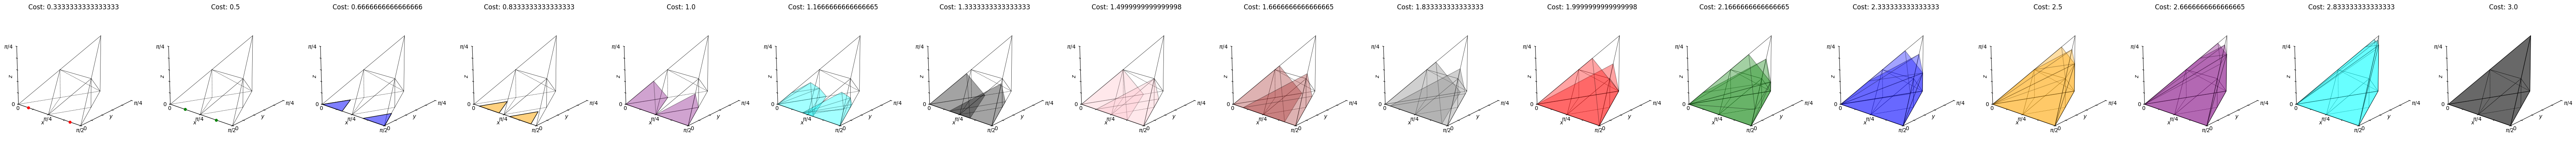

In [120]:
cov = gates_to_coverage_plot(*gate_set, costs=costs)
# print(gates_to_haar(*gate_set))

In [121]:
expected_cost(cov)

1.5852968488391408

In [123]:
with open('zzphase_coverage.pkl', 'wb') as f:
    pickle.dump(cov, f)

In [87]:
# if fuzzy_equal(a, 0.5) and fuzzy_equal(b, 0) and fuzzy_equal(c, 0): # CX == RZZGate(pi/2)
#     return 1
# if fuzzy_equal(a, 0.5) and fuzzy_equal(b, 0.5) and fuzzy_equal(c, 0): # iSWAP == RZZGate(pi/2) + RZZGate(pi/2)
#     return 2
# if fuzzy_equal(a, 0.25) and fuzzy_equal(b, 0.25) and fuzzy_equal(c, 0): # SQiSW == RZZGate(pi/4) + RZZGate(pi/4)
#     return 1
# if fuzzy_equal(a, 0.5) and fuzzy_equal(b, 0.5) and fuzzy_equal(c, 0.5): # SWAP == RZZGate(pi/2) + RZZGate(pi/2) + RZZGate(pi/2)
#     return 3
# if fuzzy_equal(a, 0.5) and fuzzy_equal(b, 0.25) and fuzzy_equal(c, 0.25): # ECP == RZZGate(pi/2) + RZZGate(pi/4) + RZZGate(pi/4)
#     return 2
# if fuzzy_equal(a, 0.5) and fuzzy_equal(b, 0.25) and fuzzy_equal(c, 0): # B == RZZGate(pi/2) + RZZGate(pi/4)
#     return 1.5
# if fuzzy_equal(a, 0.25) and fuzzy_equal(b, 0) and fuzzy_equal(c, 0): # CV == RZZGate(pi/4)
#     return 0.5

print(coverage_lookup_cost(cov, CanonicalGate(0.5, 0, 0))[0])
print(coverage_lookup_cost(cov, CanonicalGate(0.5, 0.5, 0))[0])
print(coverage_lookup_cost(cov, CanonicalGate(0.25, 0.25, 0))[0])
print(coverage_lookup_cost(cov, CanonicalGate(0.5, 0.5, 0.5))[0])
print(coverage_lookup_cost(cov, CanonicalGate(0.5, 0.25, 0.25))[0])
print(coverage_lookup_cost(cov, CanonicalGate(0.25, 0., 0))[0])


1.0
1.9999999999999998
1.0
3.0
1.9999999999999998
0.5


In [72]:
import accel_utils
accel_utils.synth_cost_by_zzphase(0.5, 0.25, 0.25)

2.0

### iSWAP-family: $\left\{ \mathrm{iSWAP}^{\frac{1}{2}},  \mathrm{iSWAP} \right\}$

In [ ]:
gate_set = [iSwapGate().power(0.5), iSwapGate()]
costs = [0.5, 1.0]

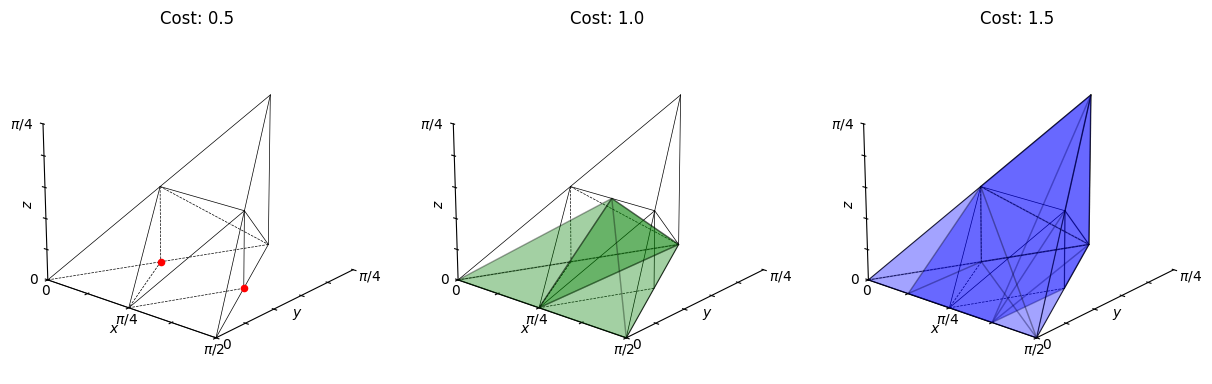

In [125]:
cov = gates_to_coverage_plot(*gate_set, costs=costs)

In [126]:
expected_cost(cov)

1.104941318157839

In [127]:
with open('sqisw_coverage.pkl', 'wb') as f:
    pickle.dump(cov, f)

### CX-family with Mirrors: $\left\{  \mathrm{CX}^{\frac{1}{3}},  \mathrm{CX}^{\frac{1}{2}},  \mathrm{CX}, \mathrm{Can}\left(0.5, 0.5, \frac{1}{6}\right),  \mathrm{Can}(0.5, 0.5, 0.25), \mathrm{iSWAP} \right\}$

In [128]:
gate_set = [RZZGate(pi/6), RZZGate(pi/4), RZZGate(pi/2), CanonicalGate(0.5, 0.5, 1/3), CanonicalGate(0.5, 0.5, 1/4), CanonicalGate(0.5, 0.5, 0)]
costs = [1/3, 1/2, 1, 2-1/3, 2-1/2, 1]
names = ['RZZ_π_6', 'RZZ_π_4', 'RZZ_π_2', 'pSWAP_π_6', 'pSWAP_π_4', 'pSWAP_π_2']

In [129]:
cov = gates_to_coverage(
    *gate_set,
    costs=costs,
    names=names
)

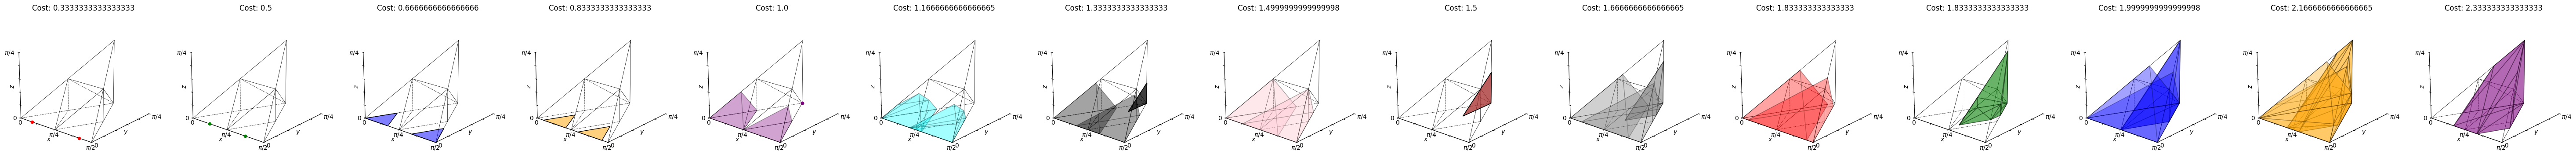

In [130]:
_plot_coverage_set(cov)

In [131]:
with open('zzphase_with_mirror_coverage.pkl', 'wb') as f:
    pickle.dump(cov, f)

In [75]:
expected_cost(cov)

1.5414867659550662

In [93]:
cx_time = optimal_can_gate_duration(0.5, 0, 0, 1, 1, 0)
iswap_time = optimal_can_gate_duration(0.5, 0.5, 0, 1, 1, 0)
swap_time = optimal_can_gate_duration(0.5, 0.5, 0.5, 1, 1, 0)
costs = [cx_time/3, cx_time/2, cx_time, 
            swap_time - (swap_time - iswap_time) / 3, (iswap_time + swap_time) / 2, iswap_time]

In [94]:
costs

[0.5235987755982988,
 0.7853981633974483,
 1.5707963267948966,
 2.0943951023931953,
 1.9634954084936207,
 1.5707963267948966]

### iSWAP-family with Mirrors: $\left\{ \mathrm{iSWAP}^{\frac{1}{2}},  \mathrm{iSWAP}, \mathrm{ECP}, \mathrm{CX} \right\}$

In [ ]:
gate_set = [iSwapGate().power(0.5), iSwapGate(), CanonicalGate(0.5, 0.25, 0.25), CXGate()]
costs = [0.5, 1, 0.5, 1]

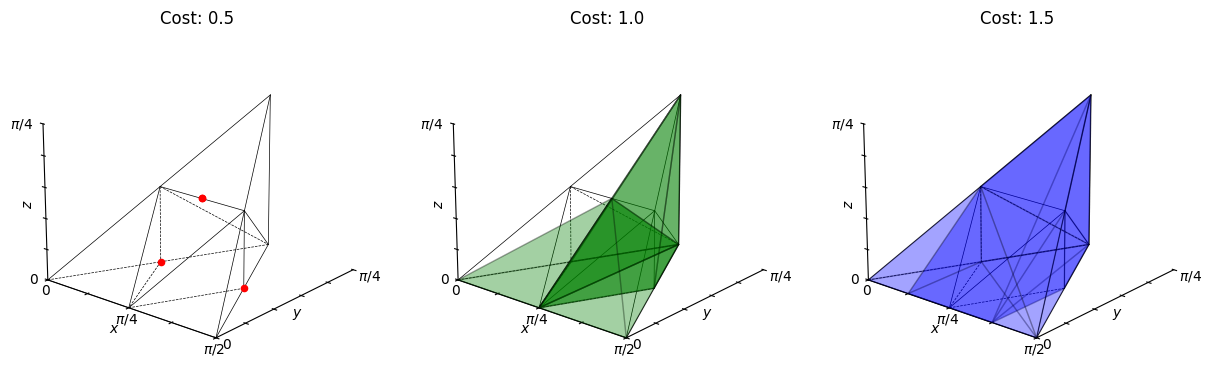

In [133]:
cov = gates_to_coverage_plot(*gate_set, costs=costs)

In [108]:
expected_cost(cov)

1.0281925224994681

In [136]:
with open('sqisw_with_mirror_coverage.pkl', 'wb') as f:
    pickle.dump(cov, f)

### CX-family and iSWAP-family

In [142]:
gate_set = [RZZGate(pi/6), RZZGate(pi/4), RZZGate(pi/2), iSwapGate().power(0.5), iSwapGate()]
costs = [1/3, 1/2, 1, 0.75, 1.5]

In [143]:
cov = gates_to_coverage(*gate_set, costs=costs)

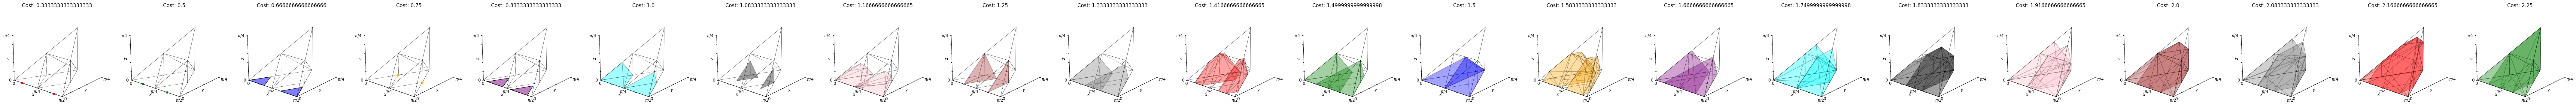

In [144]:
_plot_coverage_set(cov)

In [145]:
expected_cost(cov)

1.4134510087879435

In [146]:
with open('het_isa_coverage.pkl', 'wb') as f:
    pickle.dump(cov, f)